# Business Understanding

### Context
As the world continues to warm through climate change, food available and security is increasingly at risk. Understanding the expected yields for certain products in various regions of the world can give insight into where food scarcity might become a pressing issue in the future. This understanding is critical for planning and implementing strategies to mitigate the impact of climate change on agriculture.

Predictive models can be developed to forecast crop yields under different climate scenarios, allowing policymakers and farmers to make informed decisions about crop selection, irrigation practices, and resource allocation. International cooperation and investment in sustainable agricultural technologies will be essential to enhance food security globally, especially in areas most susceptible to the adverse effects of climate change.

### Business Needs
This use-case aims to understand crop yields for some of the most basic crops in various regions around the world with varying conditions. This will allow governments and businesses to project what yields can be expected as well as additional action to take to protect agricultural yields.

For this dataset, we need to predict the yield value in the provided yield dataframe

# Data Understanding

The goal in data understanding is to simply look at what is available and identify any gaps. The process of cleaning and preparing the data will take place in the next stage (Data Preparation)

I created a helper function to assist in the inspection of the dataframe. This function can be seen below under "Helper Functions"

## Imports and Constants

### NOTE!
I use helper functions imported from utils.py file. Please review utils.py for these functions

In [27]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model / Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Helper Functions
from utils import *

In [28]:
filepath = './crop_yield/data/'

## Pesticides DF

In [29]:
pesticides_df = pd.read_csv(f'{filepath}/faostat_pesticides.csv')
pesticides_df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201


In [30]:
print_df_information(pesticides_df, 'Pesticides')

 === Inspecting Pesticides DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB
-------------
None
-------------
 Head: 
           Domain     Area           Element                Item  Year  \
0  Pesticides Use  Albania  Agricultural Use  Pesticides (total)  1990   
1  Pesticides Use  Albania  Agricultural Use  Pesticides (total)  1991   
2  Pesticides Use  Albania  Agricultural Use  Pesticides (total)  1992   
3  Pesticides Use  Albania  Agricultural Use  Pesticides (total)  1993   
4  Pesticides Use  Albania  Agricultural Use  Pesticides 

### Pesticides DF Charts

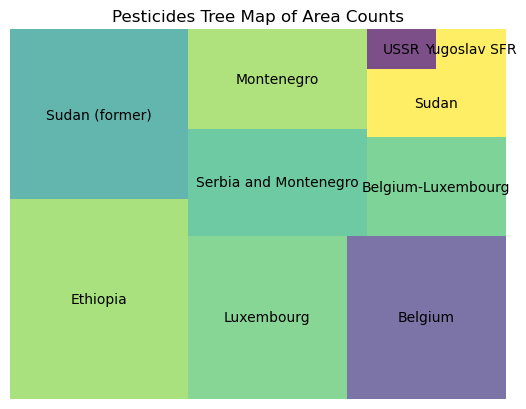

In [31]:
plot_tree_viz(pesticides_df, 'Pesticides', 'Area')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


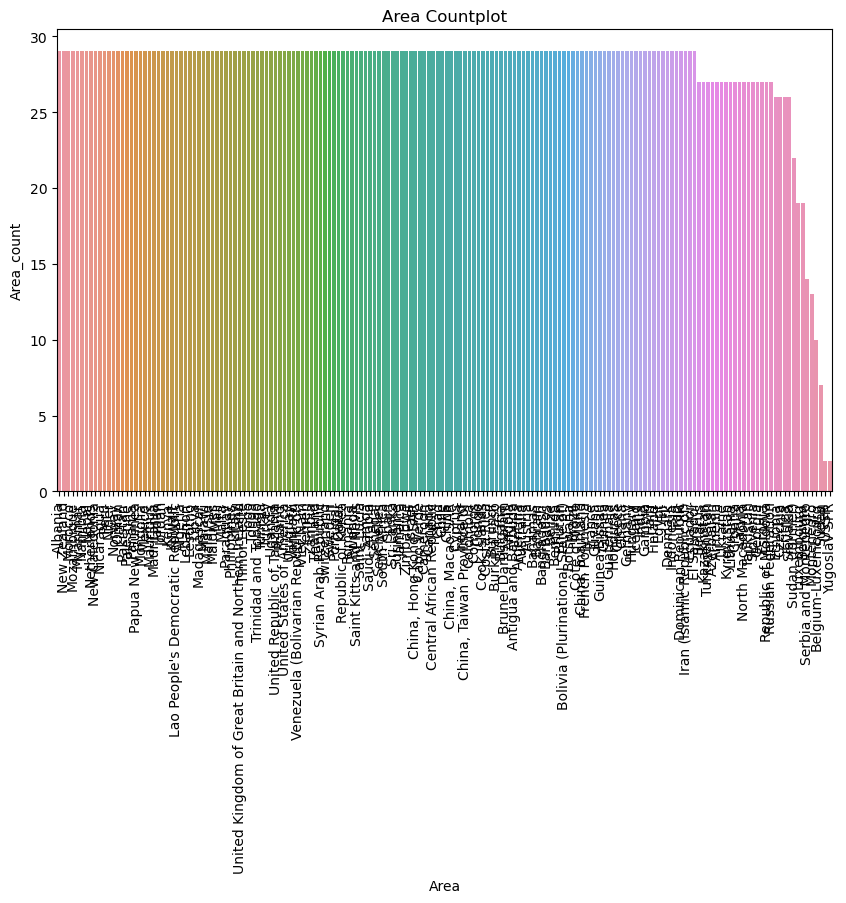

In [32]:
plot_categorical_count_plot(pesticides_df, 'Pesticides', 'Area')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


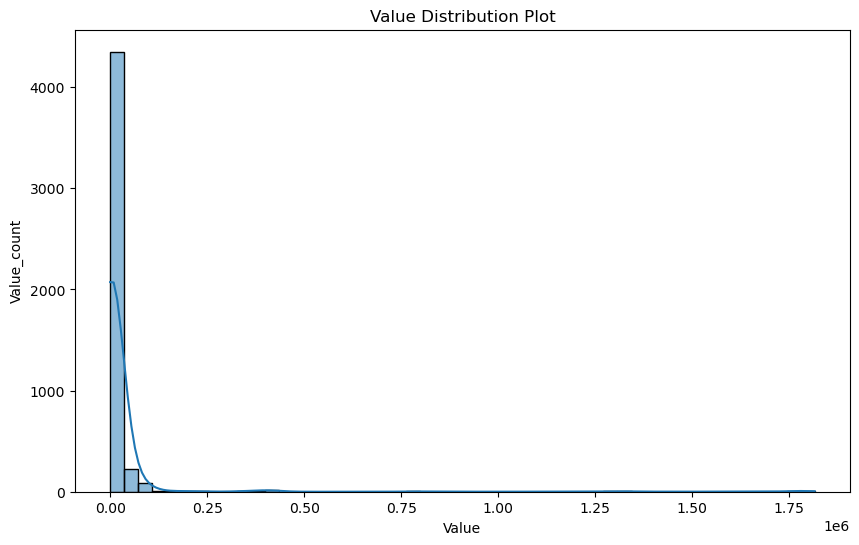

In [33]:
plot_numerical_distribution_plot(pesticides_df, 'Pesticides', 'Value')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


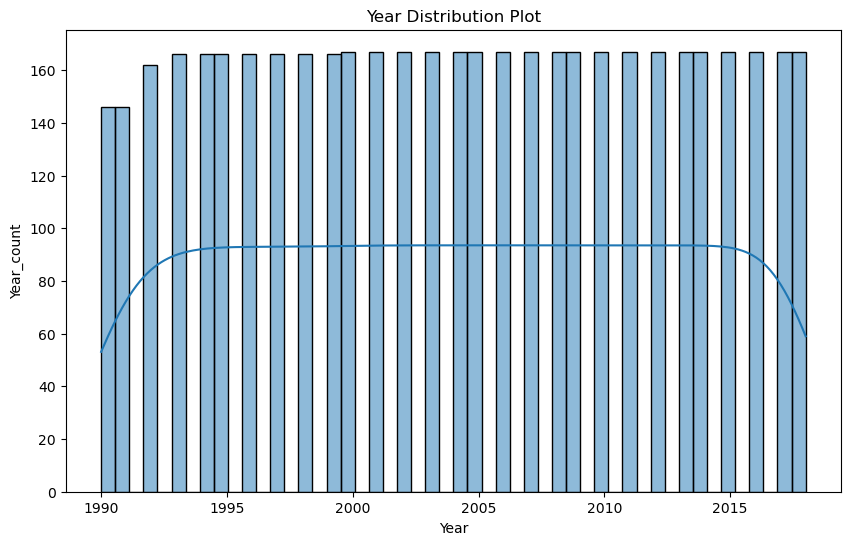

In [34]:
plot_numerical_distribution_plot(pesticides_df, 'Pesticides', 'Year')

### Comments on Pesticides DF: 
- From this it might make sense to just keep a few columns from pesticides_df. Several columns only have a single value. 
- Also there are a few years and areas that have incomplete data so I'll probably drop those values to ensure I have a complete dataset
- I may need to do outlier removal for 'Value' as it looks like it has several very large values skewing the data

## Rainfall DF

In [35]:
rainfall_df = pd.read_csv(f'{filepath}/worldbank_rainfall.csv')
rainfall_df.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Afghanistan,AFG
1,13.9480,1901,Feb Average,Afghanistan,AFG
2,43.8464,1901,Mar Average,Afghanistan,AFG
3,26.9610,1901,Apr Average,Afghanistan,AFG
4,52.9579,1901,May Average,Afghanistan,AFG


In [36]:
print_df_information(rainfall_df, 'Rainfall')

 === Inspecting Rainfall DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1    Year            272832 non-null  int64  
 2    Statistics      272832 non-null  object 
 3    Country         272832 non-null  object 
 4    ISO3            272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB
-------------
None
-------------
 Head: 
   Rainfall - (MM)   Year    Statistics       Country  ISO3
0          55.7448   1901   Jan Average   Afghanistan   AFG
1          13.9480   1901   Feb Average   Afghanistan   AFG
2          43.8464   1901   Mar Average   Afghanistan   AFG
3          26.9610   1901   Apr Average   Afghanistan   AFG
4          52.9579   1901   May Average   Afghanistan   AFG
-------------
 Columns: Index(['Rainfall - (MM)', ' Year',

### Rainfall DF Charts

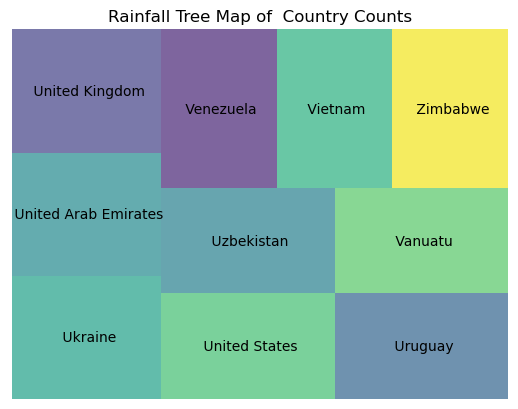

In [37]:
plot_tree_viz(rainfall_df, 'Rainfall', ' Country')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


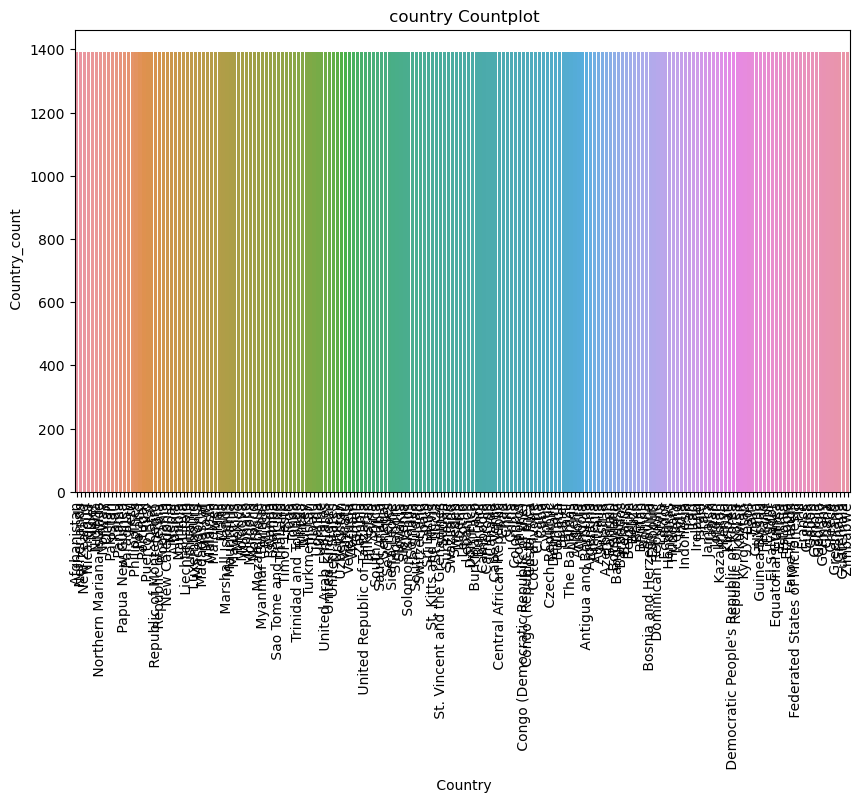

In [38]:
plot_categorical_count_plot(rainfall_df, 'Rainfall', ' Country')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


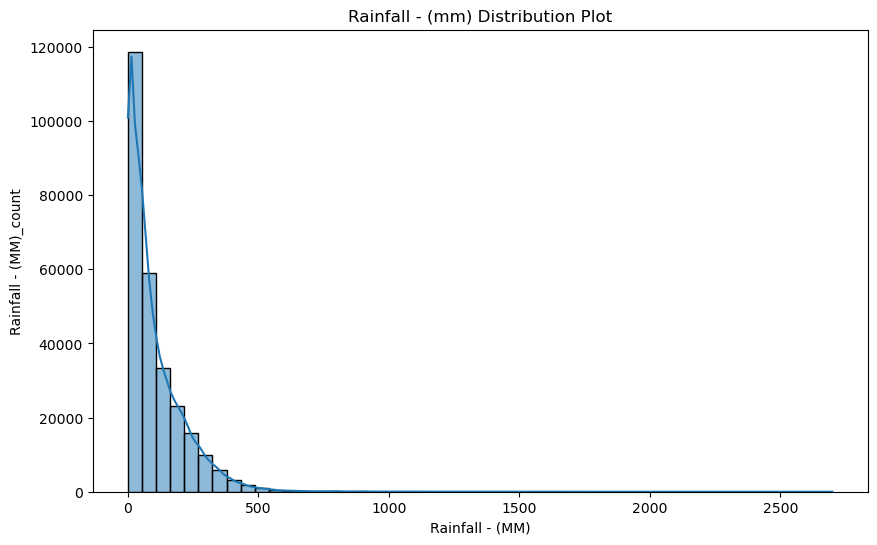

In [39]:
plot_numerical_distribution_plot(rainfall_df, 'Rainfall', 'Rainfall - (MM)')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


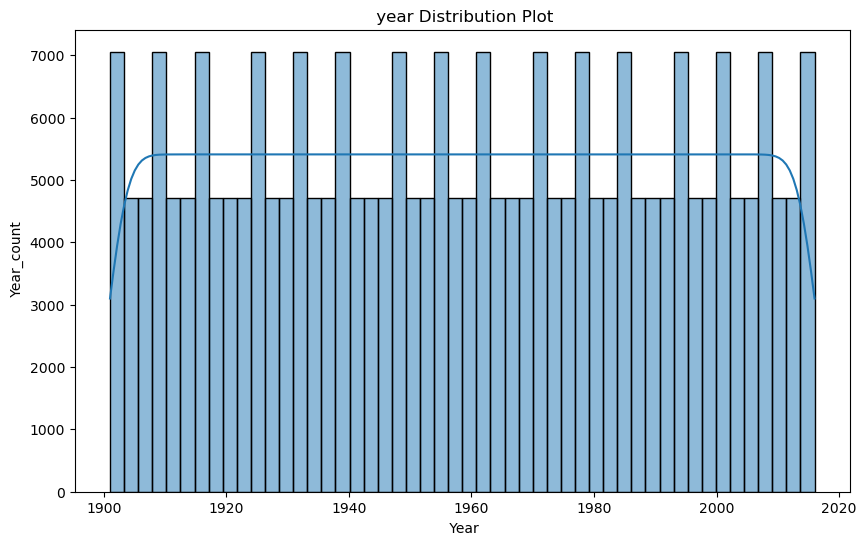

In [40]:
plot_numerical_distribution_plot(rainfall_df, 'Rainfall', ' Year')

### Comments on Rainfall DF: 
- This dataframe appears to have a good amount and distribution of data. I would probably not need to remove any columns based on quality or uniqueness, however, it does appear that country and ISO3 contain similar information. I've also noticed that the columns have some weird spacing so this will need to be addressed. 
- The column "Statistics" is narrow formatted instead of wide so this will also need to be addressed as well.

## Temperature DF

In [41]:
temperature_df = pd.read_csv(f'{filepath}/worldbank_temperature.csv')
temperature_df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG


In [42]:
print_df_information(temperature_df, 'Temperature')

 === Inspecting Temperature DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1    Year                    272832 non-null  int64  
 2    Statistics              272832 non-null  object 
 3    Country                 272832 non-null  object 
 4    ISO3                    272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB
-------------
None
-------------
 Head: 
   Temperature - (Celsius)   Year    Statistics       Country  ISO3
0                 -0.03780   1901   Jan Average   Afghanistan   AFG
1                  2.42348   1901   Feb Average   Afghanistan   AFG
2                  9.36230   1901   Mar Average   Afghanistan   AFG
3                 13.55640   1901   Apr Average   Afghanistan   AFG
4                 1

### Temperature DF Charts

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


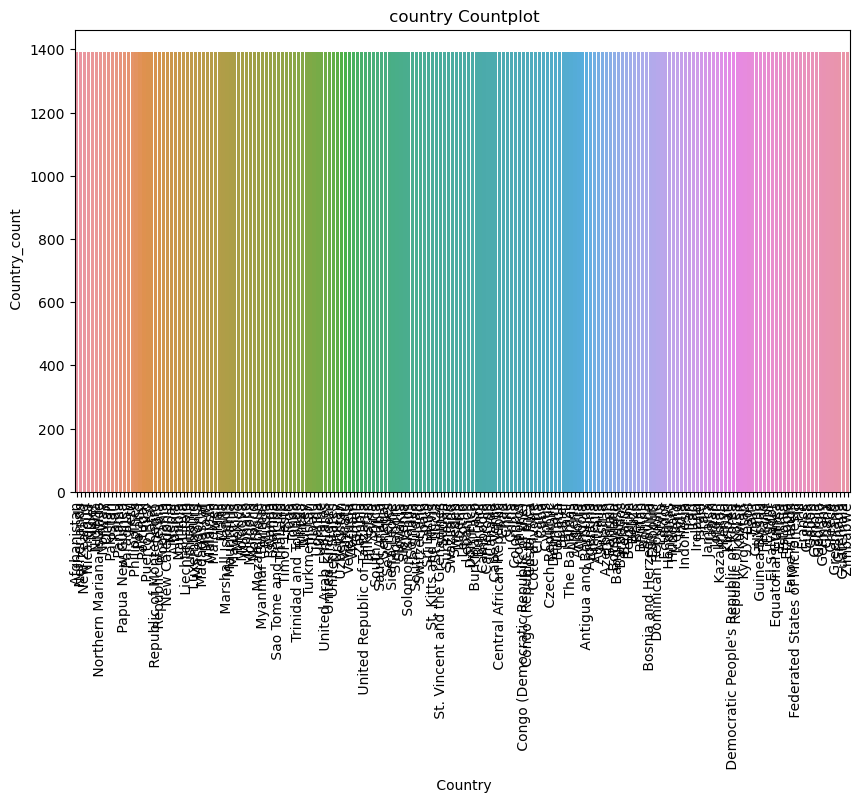

In [43]:
plot_categorical_count_plot(temperature_df, 'Temperature', ' Country')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


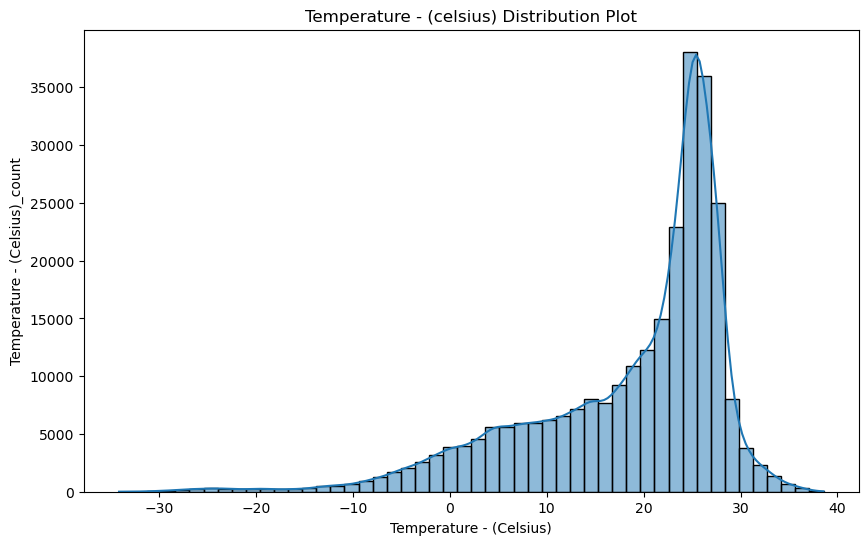

In [44]:
plot_numerical_distribution_plot(temperature_df, 'Temperature', 'Temperature - (Celsius)')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


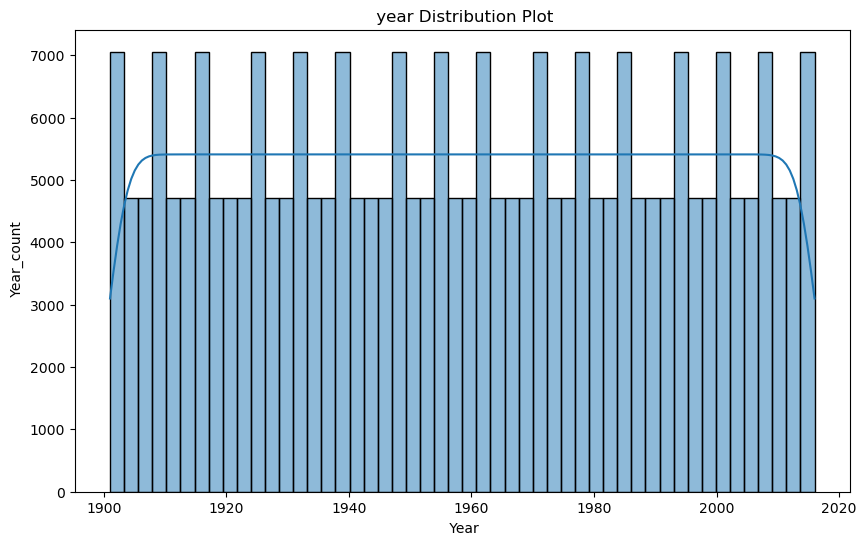

In [45]:
plot_numerical_distribution_plot(temperature_df, 'Temperature', ' Year')

### Comments on Temperature DF
- This dataframe seems to mirror the rainfall dataframe in structure so the only column that will be dropped is ISO3. 
- Similar to the rainfall DF, some manipulation will be required to structure this dataframe into a more usable format.

## Yield DF

In [46]:
yield_df = pd.read_csv(f'{filepath}/faostat_yield.csv')
yield_df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857


In [47]:
print_df_information(yield_df, 'Yield')

 === Inspecting Yield DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB
-------------
None
-------------
 Head: 
  Domain         Area Element    Item  Year   Unit  Value
0  Crops  Afghanistan   Yield  Barley  1961  hg/ha  10800
1  Crops  Afghanistan   Yield  Barley  1962  hg/ha  10800
2  Crops  Afghanistan   Yield  Barley  1963  hg/ha  10800
3  Crops  Afghanistan   Yield  Barley  1964  hg/ha  10857
4  Crops  Afghanistan   Yield  Barley  1965  hg/ha  10857
-------------
 Columns: Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 

### Yield DF Charts

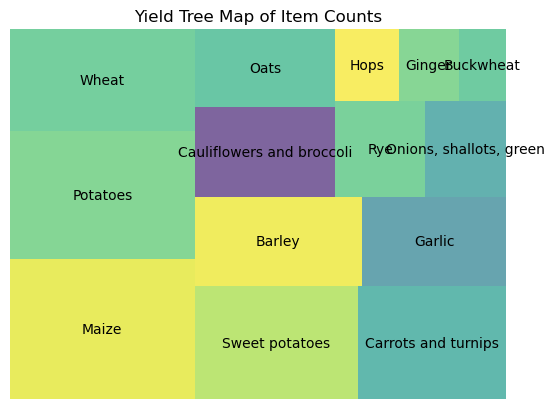

In [48]:
plot_tree_viz(yield_df, 'Yield', 'Item', True, 15)

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


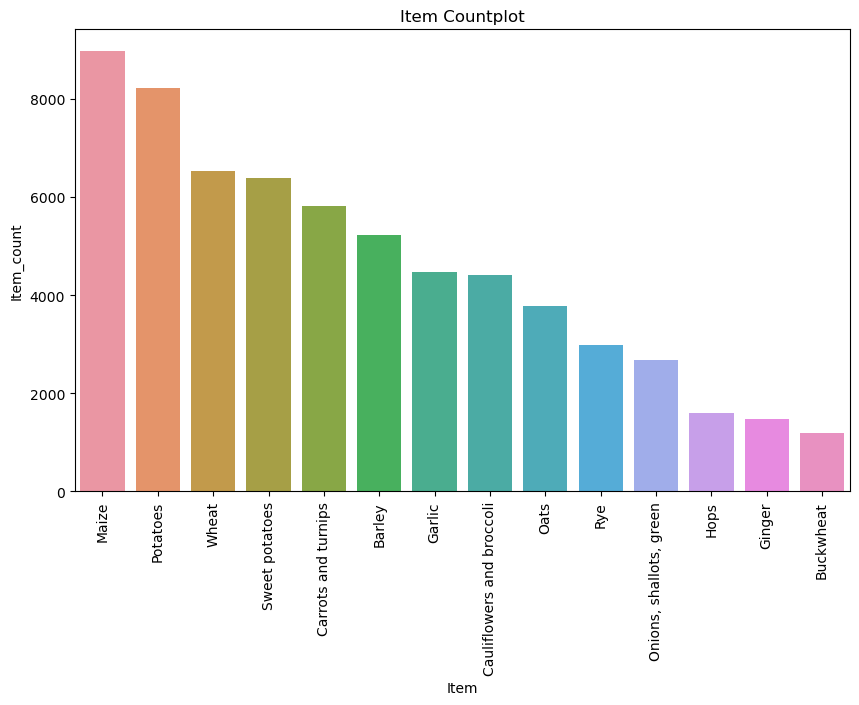

In [49]:
plot_categorical_count_plot(yield_df, 'Yield', 'Item')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


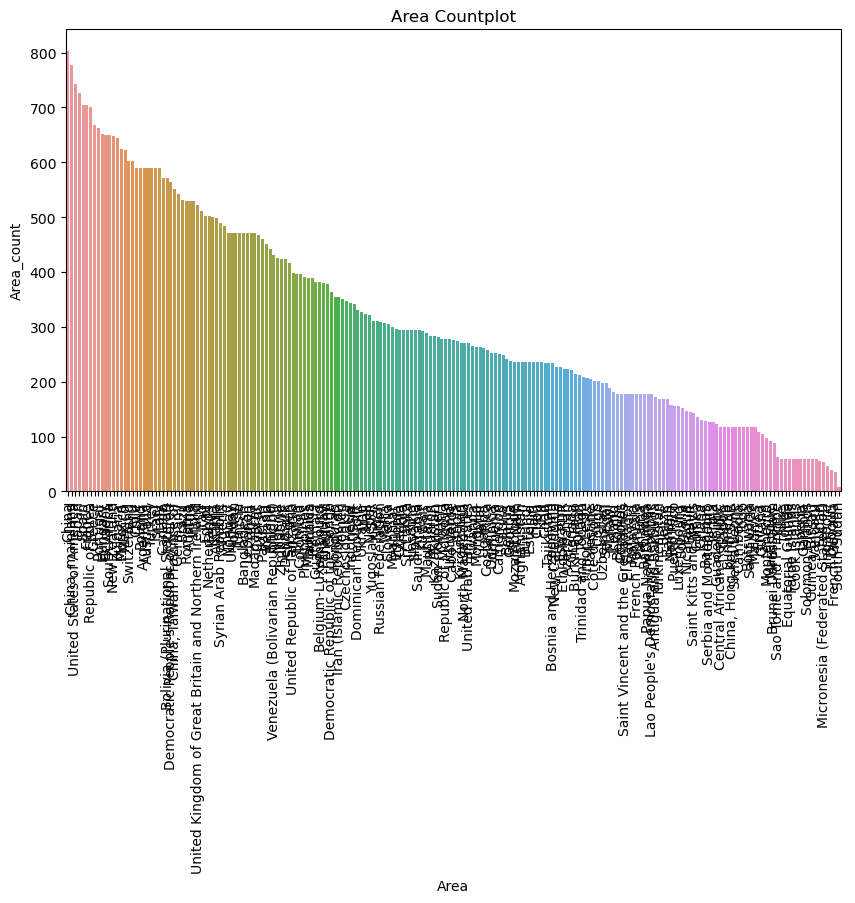

In [50]:
plot_categorical_count_plot(yield_df, 'Yield', 'Area')

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


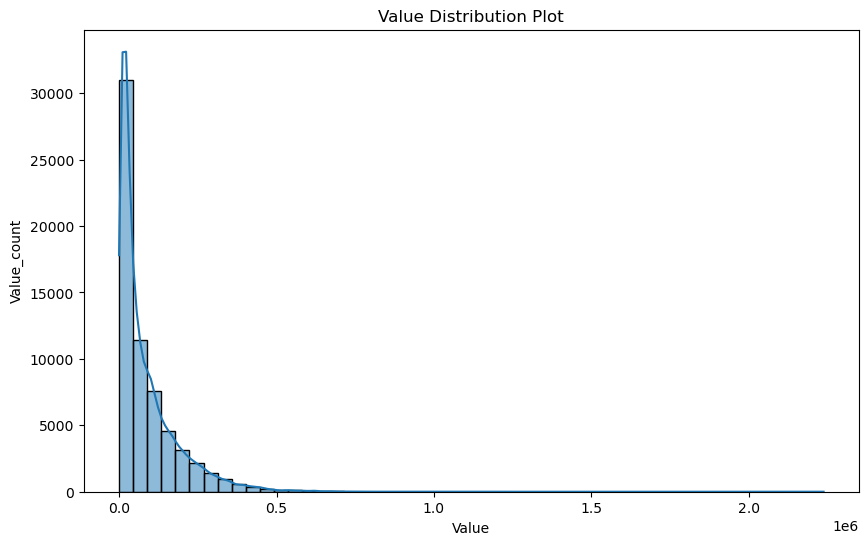

In [51]:
plot_numerical_distribution_plot(yield_df, 'Yield', 'Value')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    63691 non-null  int64
 1   Item    63691 non-null  int64
 2   Year    63691 non-null  int64
 3   Value   63691 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


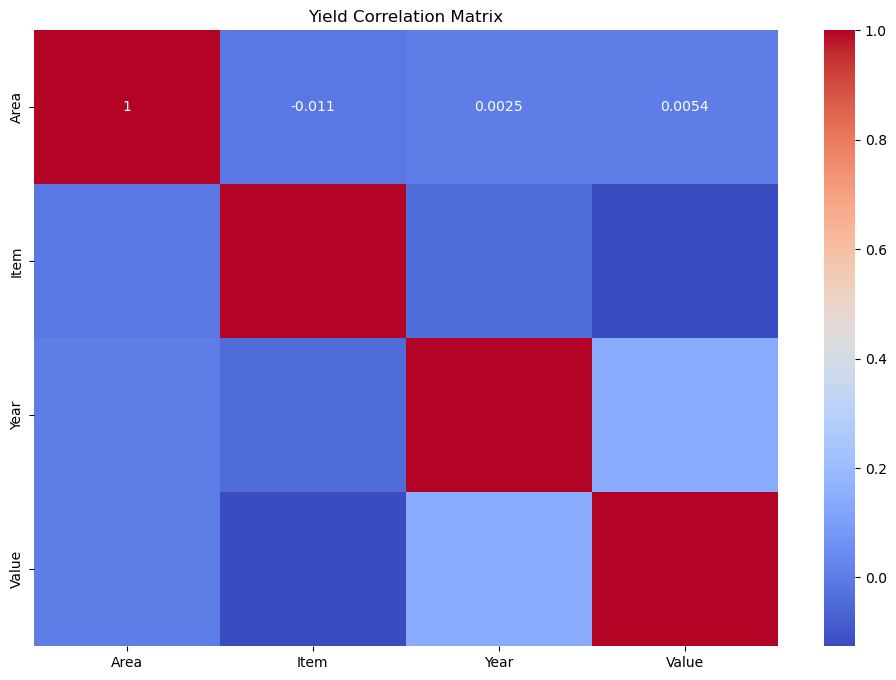

In [52]:
# Correlation Matrix for Yield
le = LabelEncoder()
yield_df_corr = yield_df.copy()
yield_df_corr['Item'] = le.fit_transform(yield_df['Item'])
yield_df_corr['Area'] = le.fit_transform(yield_df['Area'])
yield_df_corr = yield_df_corr.drop(columns=['Domain', 'Element', 'Unit'])
yield_df_corr.info()

yield_corr = yield_df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(yield_corr, annot=True, cmap='coolwarm')
plt.title('Yield Correlation Matrix')
plt.savefig('./crop_yield/images/yield_corr.png')

### Comments on Yield DF
- This dataframe seems to have varying amounts of data per country (or area) and item. Initially I thought there might be a relationship here (for example, the dataset may only have soybeans for the US or something similar) but after reviewing the correlation matrix, this does not appear to be the case
- For this use-case, I may need to downselect to the top 5 items and top 10 countries to ensure I have enough data to work with. 

# Data Preparation


For data preparation, my goal is to create a single dataframe with clean, useable data. I'll start by cleaning each dataframe to ensure they can be merged and then move on to final merge and preparation.

## Pesticides DF

In [53]:
cols_to_remove = ['Domain', 'Element', 'Unit', 'Item']
cols_to_rename = {'Value': 'Pesticide_annual_value', 'Area': 'geographic_area'}
pesticides_clean_df = pesticides_df.drop(columns=cols_to_remove)
pesticides_clean_df = pesticides_clean_df.rename(columns=cols_to_rename)
pesticides_clean_df.head()

,geographic_area,Year,Pesticide_annual_value
0,Albania,1990,121
1,Albania,1991,121
2,Albania,1992,121
3,Albania,1993,121
4,Albania,1994,201


## Rainfall DF

In [54]:
# Clean Headers
rainfall_clean_df = rainfall_df.copy()

# Pivot on Statistics and Reset Index
rainfall_clean_df = rainfall_clean_df.pivot(index=[' Country',' Year'] , columns=' Statistics', values='Rainfall - (MM)')
rainfall_clean_df.reset_index(inplace=True)

# Clean up col names
for col in rainfall_clean_df.columns:
    new_col = col.strip()
    if 'average' in new_col.lower():
        new_col = new_col.replace('Average', '').replace(' ','_rainfall_avg_mm')
    if 'country' in new_col.lower():
        new_col = 'geographic_area'
    rainfall_clean_df.rename(columns={col: new_col}, inplace=True)

# Reorder Columns
col_month_order = [
    'Jan_rainfall_avg_mm', 'Feb_rainfall_avg_mm', 'Mar_rainfall_avg_mm', 'Apr_rainfall_avg_mm', 'May_rainfall_avg_mm', 'Jun_rainfall_avg_mm', 
    'Jul_rainfall_avg_mm', 'Aug_rainfall_avg_mm', 'Sep_rainfall_avg_mm', 'Oct_rainfall_avg_mm', 'Nov_rainfall_avg_mm', 'Dec_rainfall_avg_mm']
rainfall_clean_df = rainfall_clean_df[['geographic_area', 'Year'] + col_month_order]

# Removing leading and trailing whitespaces
rainfall_clean_df['geographic_area'] = rainfall_clean_df['geographic_area'].str.strip()

rainfall_clean_df.head()

Statistics,geographic_area,Year,Jan_rainfall_avg_mm,Feb_rainfall_avg_mm,Mar_rainfall_avg_mm,Apr_rainfall_avg_mm,May_rainfall_avg_mm,Jun_rainfall_avg_mm,Jul_rainfall_avg_mm,Aug_rainfall_avg_mm,Sep_rainfall_avg_mm,Oct_rainfall_avg_mm,Nov_rainfall_avg_mm,Dec_rainfall_avg_mm
0,Afghanistan,1901,55.7448,13.9480,43.8464,26.9610,52.95790,16.64650,7.38656,0.59306,4.82593,11.49720,8.61022,7.90607
1,Afghanistan,1902,24.1121,20.8288,41.8576,29.9279,8.98336,5.35169,3.15428,1.11072,2.26390,19.80420,43.14890,18.75370
2,Afghanistan,1903,49.3334,45.6953,69.7291,33.0954,60.69170,7.62944,5.63623,4.65012,7.45214,0.87910,9.91327,19.81380
3,Afghanistan,1904,67.9221,23.6132,80.0829,26.0583,29.94850,0.65549,3.95575,3.19320,10.45400,16.76420,17.90430,18.23420
4,Afghanistan,1905,65.5861,32.6160,64.7628,27.6942,19.14470,5.04219,1.58474,1.03713,6.96228,1.07818,3.42445,41.20520


## Temperature DF

In [55]:
# Clean Headers
temperature_clean_df = temperature_df.copy()

# Pivot on Statistics and Reset Index
temperature_clean_df = temperature_clean_df.pivot(index=[' Country',' Year'] , columns=' Statistics', values='Temperature - (Celsius)')
temperature_clean_df.reset_index(inplace=True)

# Clean up col names
for col in temperature_clean_df.columns:
    new_col = col.strip()
    if 'average' in new_col.lower():
        new_col = new_col.replace('Average', '').replace(' ','_temp_avg_celsius')
    if 'country' in new_col.lower():
        new_col = 'geographic_area'
    temperature_clean_df.rename(columns={col: new_col}, inplace=True)

# # Reorder Columns
col_month_order = [
    'Jan_temp_avg_celsius', 'Feb_temp_avg_celsius', 'Mar_temp_avg_celsius', 'Apr_temp_avg_celsius', 'May_temp_avg_celsius', 'Jun_temp_avg_celsius', 
    'Jul_temp_avg_celsius', 'Aug_temp_avg_celsius', 'Sep_temp_avg_celsius', 'Oct_temp_avg_celsius', 'Nov_temp_avg_celsius', 'Dec_temp_avg_celsius']
temperature_clean_df = temperature_clean_df[['geographic_area', 'Year'] + col_month_order]

# Removing leading and trailing whitespaces
temperature_clean_df['geographic_area'] = temperature_clean_df['geographic_area'].str.strip()

temperature_clean_df.head()

Statistics,geographic_area,Year,Jan_temp_avg_celsius,Feb_temp_avg_celsius,Mar_temp_avg_celsius,Apr_temp_avg_celsius,May_temp_avg_celsius,Jun_temp_avg_celsius,Jul_temp_avg_celsius,Aug_temp_avg_celsius,Sep_temp_avg_celsius,Oct_temp_avg_celsius,Nov_temp_avg_celsius,Dec_temp_avg_celsius
0,Afghanistan,1901,-0.03780,2.42348,9.36230,13.5564,18.1509,22.1727,25.3787,23.6652,19.4655,11.2837,8.63190,4.02148
1,Afghanistan,1902,2.43386,2.32874,7.61617,12.3997,19.4873,24.1452,25.0482,24.2475,19.0351,12.9641,7.19137,3.21455
2,Afghanistan,1903,-1.58800,2.60490,2.19759,10.9805,17.0656,23.4819,24.7819,23.8870,19.8621,14.1072,5.79271,0.90361
3,Afghanistan,1904,-5.55450,4.27782,7.50411,11.7398,17.9897,22.8683,25.0061,23.9715,18.7715,11.0836,8.79818,3.92464
4,Afghanistan,1905,-1.84350,-1.76980,3.42272,12.8392,18.7107,23.5721,25.1425,23.8485,19.0231,14.7307,7.64407,1.88543


## Yield DF

In [56]:
yield_clean_df = yield_df.copy()
cols_to_remove = ['Domain','Element','Unit']
cols_to_rename = {'Value': 'Yield_value_hgha', 'Area': 'geographic_area'}

yield_clean_df = yield_clean_df.drop(columns=cols_to_remove)
yield_clean_df = yield_clean_df.rename(columns=cols_to_rename)

yield_clean_df.head()

,geographic_area,Item,Year,Yield_value_hgha
0,Afghanistan,Barley,1961,10800
1,Afghanistan,Barley,1962,10800
2,Afghanistan,Barley,1963,10800
3,Afghanistan,Barley,1964,10857
4,Afghanistan,Barley,1965,10857


## Merged DF

In [57]:
# Merging all dataframes into one
merged_df = yield_clean_df.copy()

dfs = [pesticides_clean_df, rainfall_clean_df, temperature_clean_df]

for df in dfs:
    merged_df = merged_df.merge(df, how='left', on=['geographic_area', 'Year'])

merged_df

,geographic_area,Item,Year,Yield_value_hgha,Pesticide_annual_value,Jan_rainfall_avg_mm,Feb_rainfall_avg_mm,Mar_rainfall_avg_mm,Apr_rainfall_avg_mm,May_rainfall_avg_mm,...,Mar_temp_avg_celsius,Apr_temp_avg_celsius,May_temp_avg_celsius,Jun_temp_avg_celsius,Jul_temp_avg_celsius,Aug_temp_avg_celsius,Sep_temp_avg_celsius,Oct_temp_avg_celsius,Nov_temp_avg_celsius,Dec_temp_avg_celsius
0,Afghanistan,Barley,1961,10800,NaN,45.69990,36.3156,67.1860,83.5753,20.04200,...,8.00043,12.3588,19.2618,22.7845,25.5794,23.7778,20.5201,11.7826,6.17419,3.08765
1,Afghanistan,Barley,1962,10800,NaN,14.16970,34.7725,47.4306,54.6099,24.14150,...,9.21193,13.1595,17.8021,22.0260,25.1854,23.3050,17.3479,12.0959,4.31819,1.75110
2,Afghanistan,Barley,1963,10800,NaN,5.84007,44.8966,58.7311,71.9117,70.47760,...,7.92977,13.9198,17.1359,23.9893,25.2344,23.5669,19.0576,14.6614,7.13441,1.89387
3,Afghanistan,Barley,1964,10857,NaN,55.77470,70.4190,61.2520,58.9231,15.62370,...,9.31992,12.6143,17.8062,22.3411,24.9046,24.2136,18.7699,10.2720,5.96833,-1.22920
4,Afghanistan,Barley,1965,10857,NaN,70.58540,50.6417,33.8604,83.4531,38.47100,...,7.01450,11.3304,17.6977,22.2347,25.0150,22.7714,18.2530,15.0494,8.53311,1.75895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,20486,2185.0,57.43160,69.8620,86.8050,45.8396,0.83477,...,23.60400,21.4605,19.8480,16.9864,17.5913,19.4544,22.0932,25.9479,25.84750,26.12330
63687,Zimbabwe,Wheat,2016,19013,2185.0,44.64370,43.3963,113.2710,12.1893,2.53085,...,24.62390,21.4851,18.3658,16.9161,16.5318,18.7555,22.9919,25.8664,25.85150,25.06930
63688,Zimbabwe,Wheat,2017,17542,2185.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63689,Zimbabwe,Wheat,2018,16379,2185.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
merged_clean_df = merged_df.copy()
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geographic_area         63691 non-null  object 
 1   Item                    63691 non-null  object 
 2   Year                    63691 non-null  int64  
 3   Yield_value_hgha        63691 non-null  int64  
 4   Pesticide_annual_value  32557 non-null  float64
 5   Jan_rainfall_avg_mm     48681 non-null  float64
 6   Feb_rainfall_avg_mm     48681 non-null  float64
 7   Mar_rainfall_avg_mm     48681 non-null  float64
 8   Apr_rainfall_avg_mm     48681 non-null  float64
 9   May_rainfall_avg_mm     48681 non-null  float64
 10  Jun_rainfall_avg_mm     48681 non-null  float64
 11  Jul_rainfall_avg_mm     48681 non-null  float64
 12  Aug_rainfall_avg_mm     48681 non-null  float64
 13  Sep_rainfall_avg_mm     48681 non-null  float64
 14  Oct_rainfall_avg_mm     48681 non-null

In [59]:
length_before = len(merged_clean_df)
merged_clean_df = merged_clean_df.dropna()
length_after = len(merged_clean_df)
print(f"Records dropped from na removal: {length_before - length_after}")

Records dropped from na removal: 38462


In [60]:
merged_clean_df.reset_index(drop=True, inplace=True)
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25229 entries, 0 to 25228
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geographic_area         25229 non-null  object 
 1   Item                    25229 non-null  object 
 2   Year                    25229 non-null  int64  
 3   Yield_value_hgha        25229 non-null  int64  
 4   Pesticide_annual_value  25229 non-null  float64
 5   Jan_rainfall_avg_mm     25229 non-null  float64
 6   Feb_rainfall_avg_mm     25229 non-null  float64
 7   Mar_rainfall_avg_mm     25229 non-null  float64
 8   Apr_rainfall_avg_mm     25229 non-null  float64
 9   May_rainfall_avg_mm     25229 non-null  float64
 10  Jun_rainfall_avg_mm     25229 non-null  float64
 11  Jul_rainfall_avg_mm     25229 non-null  float64
 12  Aug_rainfall_avg_mm     25229 non-null  float64
 13  Sep_rainfall_avg_mm     25229 non-null  float64
 14  Oct_rainfall_avg_mm     25229 non-null

## Additional Analysis on Clean Data

In [61]:
# Defining target and numerical, categorical columns
target = 'Yield_value_hgha'
categorical_columns = ['geographic_area', 'Item']
numerical_columns = [col for col in merged_clean_df.columns if col not in categorical_columns and col != target]

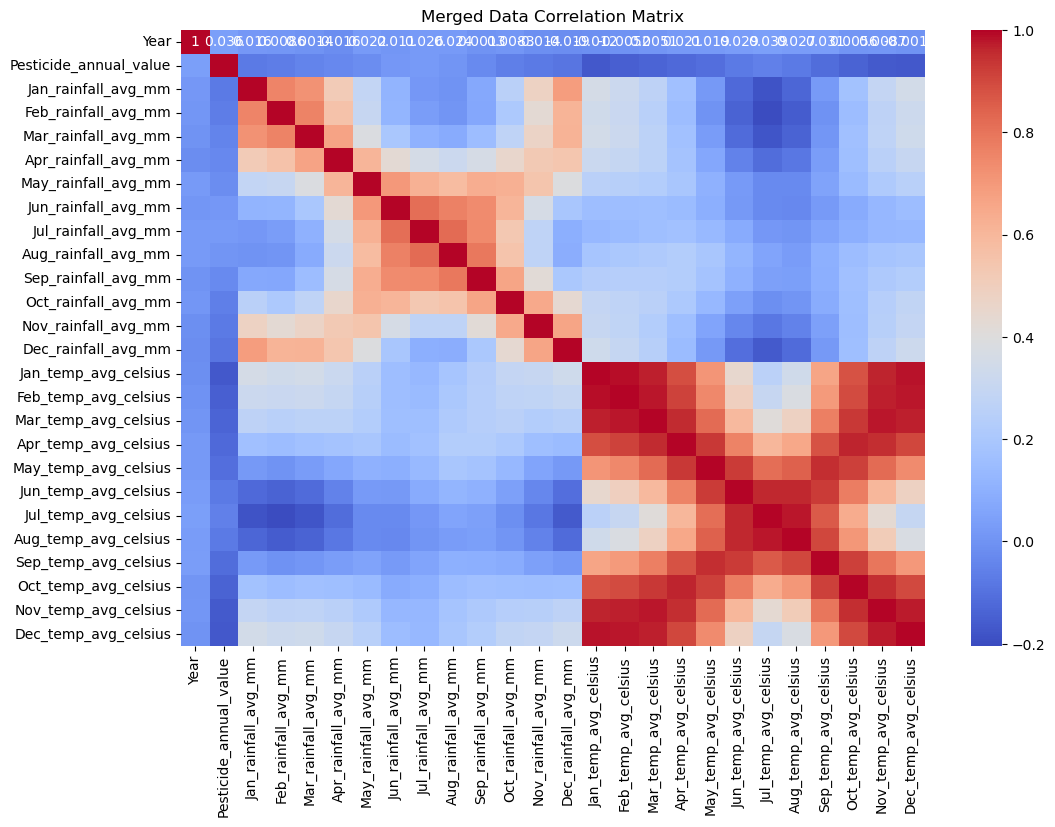

In [62]:
# Plot all the data
plt.figure(figsize=(12, 8))
sns.heatmap(merged_clean_df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Merged Data Correlation Matrix')
plt.savefig('./crop_yield/images/merged_corr.png')
plt.show()

## Preprocessing

In [63]:
# Setting up preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('Num_preprocess', StandardScaler(), numerical_columns),
        ('Cat_preprocess', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [64]:
# Splitting data into train and test
X = merged_clean_df.drop(columns=[target])
y = merged_clean_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

### Baseline

For the baseline model, I decided to start with a simple Linear Regression Model

In [65]:
# Baseline using Linear Regression
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [66]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [67]:
# Metrics
y_pred = model.predict(X_test_preprocessed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 41819.13672512109
MSE: 3807515609.6299567
R2: 0.6676024178766602


### Random Forest Regressor

I decided to try a Random Forest Regressor as ensemble models/methods tend to handle bias/variance well. They also tend to perform quite well relatively to individual models/methods. 

I want to also use a gridsearch for hyperparameter tuning:
- regressor__n_estimators: Trees in the forest
- regressor__min_samples_split: Minimum number of samples required to split an internal node
- regressor__min_samples_leaf: Minimum number of samples required to be in a leaf node
- regressor__max_depth: Max depth of a tree

In [70]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())])

In [69]:
param_grid = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
}

In [71]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time= 4.9min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time= 4.9min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time= 4.9min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time= 4.9min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time= 4.9min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('Num_preprocess',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Pesticide_annual_value',
                                                                          'Jan_rainfall_avg_mm',
                                                                          'Feb_rainfall_avg_mm',
                                                                          'Mar_rainfall_avg_mm',
                                                                          'Apr_rainfall_avg_mm',
                                                                          'May_rainfall_avg_mm',
                                                                          'Jun_rainfall_avg_mm',
                                                                          'Jul_rainfall_avg_mm',
                                                                          'Aug_rainfall_avg_mm',
                                                                          'Sep_rainfall_...
                                                                          'Dec_temp_avg_celsius']),
                                                                        ('Cat_preprocess',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['geographic_area',
                                                                          'Item'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None],
                         'regressor__min_samples_leaf': [1],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [150]},
             scoring='neg_mean_squared_error', verbose=2)

In [72]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Best score: 1072214494.6915176


# Evaluation

In [73]:
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("==== Model Evaluation ====")
print(f'MAE: {mae}\nMSE: {mse}\nR²: {r2}')

==== Model Evaluation ====
MAE: 15117.29442198441
MSE: 1006959956.8269615
R²: 0.9120920071613746


This model performs significantly better than the baseline linear regression model

| Metric | Baseline | RFR | Improvement |
| ------ | -------- | --- | ----------- |
| MAE | 41819.1 | 15117.2 | +277% |
| MSE | 3807515609.6 | 1006959956.8 | +378% |
| R^2 | 0.668 | 0.912 | +137% |

### Feature Importance

In [78]:
# Feature Importances and Names
feature_importances = grid_search.best_estimator_.named_steps['regressor'].feature_importances_
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_columns)
feature_names = np.concatenate([numerical_columns, feature_names])

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


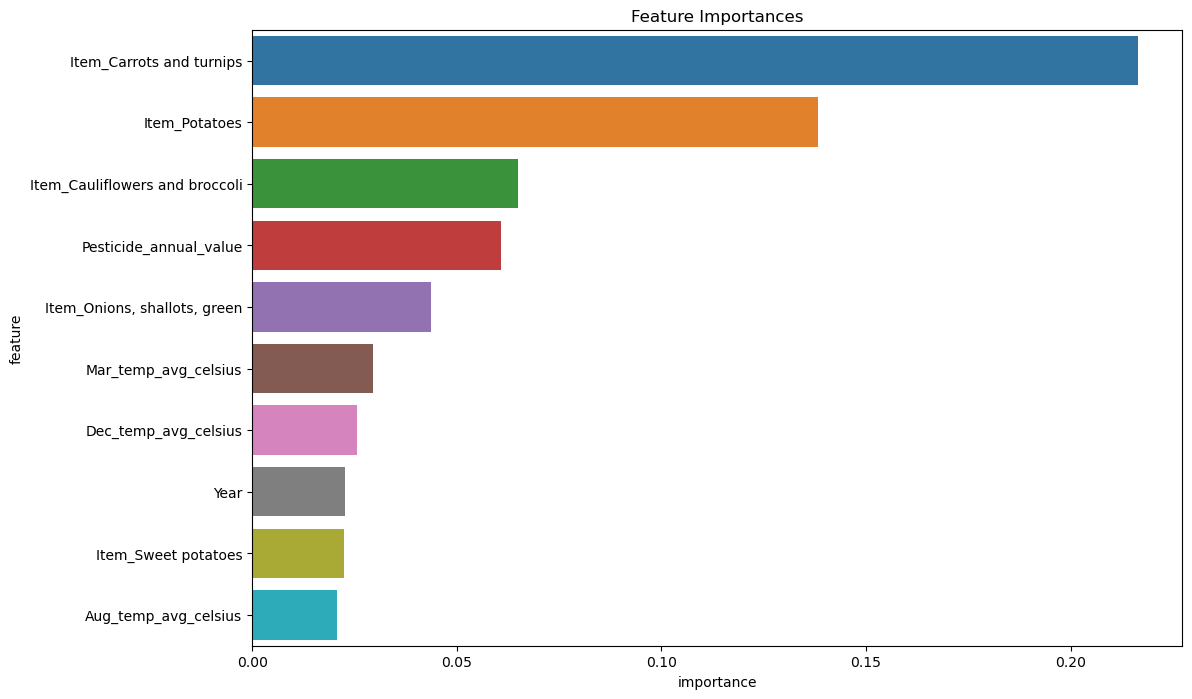

In [79]:
# Plotting
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df.head(10), x='importance', y='feature')
plt.title('Feature Importances')
plt.savefig('./crop_yield/images/feature_importances.png')
plt.show()

/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nathanmeek/opt/anaconda3/envs/py_310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


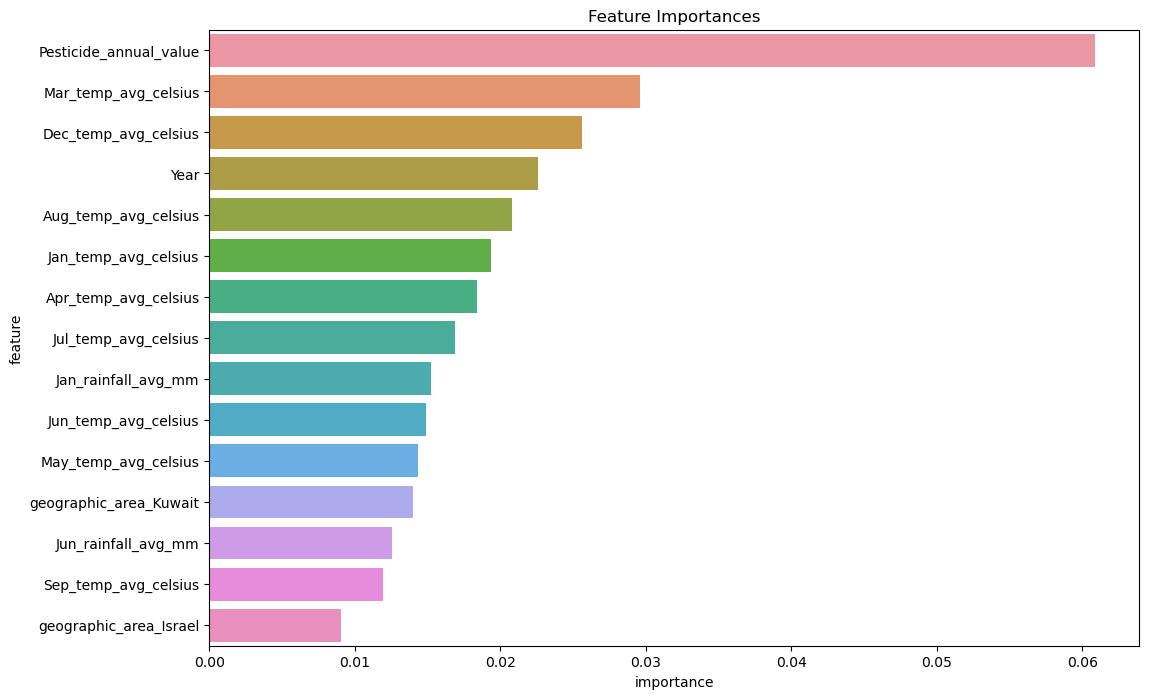

In [84]:
# Removing crop items and looking at other features
no_items_feature_importances_df = feature_importances_df[feature_importances_df['feature'].str.contains('Item') == False]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=no_items_feature_importances_df.head(15), x='importance', y='feature')
plt.title('Feature Importances')
plt.savefig('./crop_yield/images/feature_importances_no_items.png')
plt.show()

# Deployment